# **Task 1**
Create a bar chart or histogram to visualize the distribution of a categorical or a continous variable, such as the distribution of ages or genders in a population


## **Introduction**
For this task, I am using the Adult (Census Income) Dataset, which contains demographic and employment-related attributes such as age, education, occupation, work hours, and income level. This dataset is widely used for exploring patterns in income distribution and building predictive models to classify individuals based on their earnings.

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Preparing and loading the dataset

# Adding column headers as the dataset does not have headers
columns = [
    'age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(r"C:\Users\SoumenD\Downloads\adult\adult.data", names = columns)

In [3]:
# Inspecting the columns and data types
print(df.info())

# Displaying the first few rows of the dataset
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21589,44,Private,226129,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
10468,44,Self-emp-not-inc,277783,Masters,14,Never-married,Farming-fishing,Own-child,White,Male,0,0,99,United-States,<=50K
31753,20,?,71788,Some-college,10,Never-married,?,Own-child,White,Female,0,0,18,United-States,<=50K
25295,61,?,187636,Bachelors,13,Divorced,?,Unmarried,White,Female,0,0,40,United-States,<=50K
18723,26,Private,194352,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
12187,60,Private,178050,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,38,United-States,<=50K
12085,24,Private,177287,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,38,United-States,<=50K
4206,48,Private,107682,HS-grad,9,Widowed,Machine-op-inspct,Not-in-family,White,Female,0,0,10,United-States,<=50K
5091,35,Private,170263,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
16826,27,Private,218785,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## **Data Cleaning**



In [4]:
# 1. Strip leading and trailing whitespaces from all string (object) columns
str_cols = df.select_dtypes(include="object").columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# 2. Replace '?' with NaN 
df.replace('?', pd.NA, inplace=True)

# 3. Check how many missing values in each column
print(df.isnull().sum())

age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


## **Data Visualization**


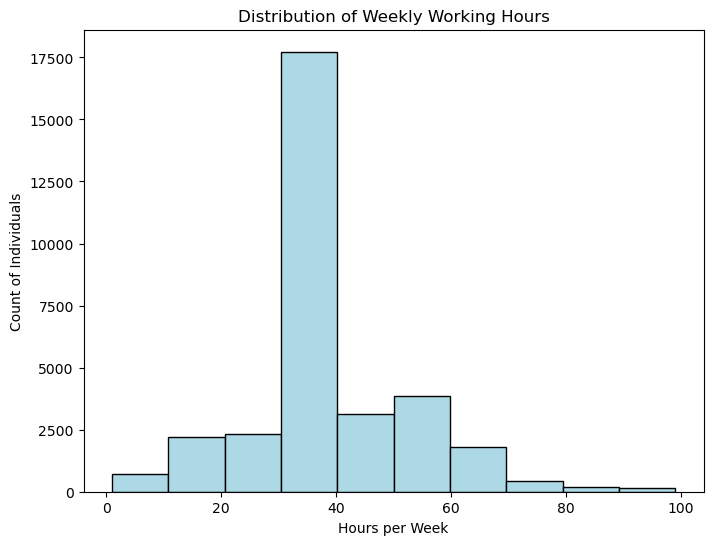

In [ ]:
# Weekly Working Hours Distribution
plt.figure(figsize=(8, 6))
plt.hist(df["hours-per-week"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribution of Weekly Working Hours")
plt.xlabel("Hours per Week")
plt.ylabel("Count of Individuals")
plt.show()


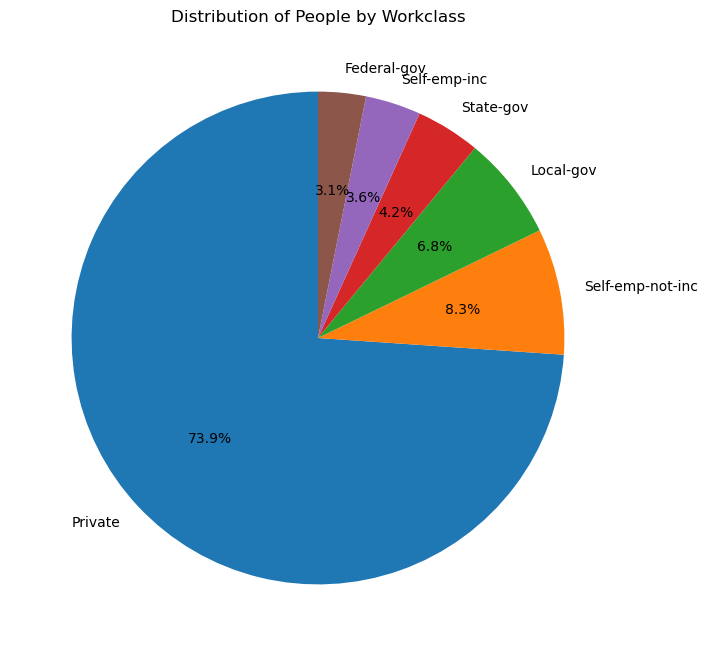

In [13]:
# Remove rows where workclass is 'Without-pay' or 'Never-worked'
df = df[~df["workclass"].isin(["Without-pay", "Never-worked"])]

# Get counts again
workclass_counts = df["workclass"].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(workclass_counts, labels=workclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of People by Workclass")
plt.show()



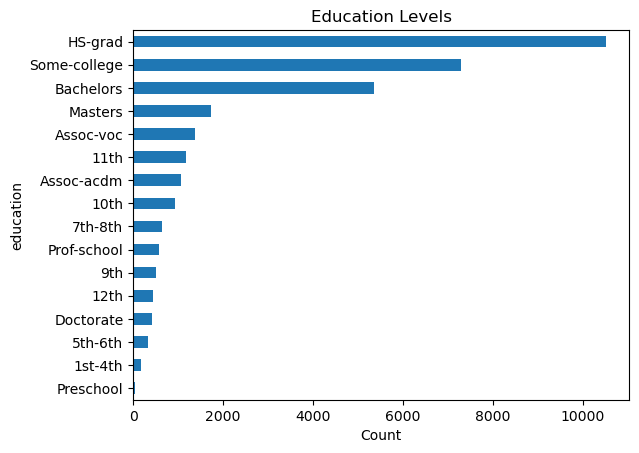

In [8]:
# Plotting the education level distribution using horizontal bar chart
df['education'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Education Levels")
plt.xlabel("Count")
plt.show()